In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import iqr
from statistics import mode 

In [2]:
data = pd.read_excel('Week2_challenge_data_source.xlsx')

In [3]:
data["MSISDN/Number"]= data["MSISDN/Number"].astype(str) 

In [4]:
data.dtypes

Bearer Id                                           object
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                       object
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             150001 non-null  object        
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [14]:
pd.options.display.float_format = '{:20,.2f}'.format

In [15]:
data.shape

(150001, 55)

In [16]:
#Aggregate per user the number of xDR sessions
#Bearer Id - xDr session identifier
#MSISDN/Number MS International PSTN/ISDN Number of mobile - customer number
xdr_session_per_user = data.groupby('MSISDN/Number').agg({'Bearer Id': 'count'})
xdr_session_per_user.head(20)

,Bearer Id
MSISDN/Number,
3197020876596.0,1
33601001722.0,1
33601001754.0,1
33601002511.0,1
33601007832.0,1
33601008617.0,2
33601010682.0,2
33601011634.0,2
33601011959.0,1


In [29]:
def univariate_nongraphical(column_name):
    mean = np.mean(column_name)
    median = np.median(column_name)
    mode_variable = mode(column_name)
    data_range = np.ptp(column_name)
    var = np.var(column_name)
    std = np.std(column_name)
    quartile = np.quantile(column_name, [0.25,0.50,0.75])
    inter = iqr(column_name)
    print('the mean of the variable = ', str(mean))
    print('the median of the variable = ', str(median))
    print('the mode of the variable = ', str(mode_variable))
    print('the range of the column = ', str(data_range))
    print('the variance of the column = ', str(var))
    print('the standard dev of the column = ', str(std))
    print('the 1st, 2nd & 3rd quartiles of the column = ', str(quartile))
    print('the interquartile range of the column = ', str(inter))
    

In [30]:
univariate_nongraphical(xdr_session_per_user['Bearer Id'])

the mean of the variable =  1.4037545504739979
the median of the variable =  1.0
the mode of the variable =  1
the range of the column =  1065
the variance of the column =  11.25613121905373
the standard dev of the column =  3.3550158299259527
the 1st, 2nd & 3rd quartiles of the column =  [1. 1. 2.]
the interquartile range of the column =  1.0


In [17]:
xdr_session_per_user.describe()

,Bearer Id
count,"106,857.00"
mean,1.40
std,3.36
min,1.00
25%,1.00
50%,1.00
75%,2.00
max,"1,066.00"


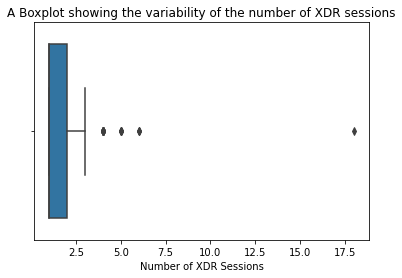

In [48]:
sample = xdr_session_per_user.sample(n=1000)
sns.boxplot(x=sample['Bearer Id'])
plt.title('A Boxplot showing the variability of the number of XDR sessions')
plt.xlabel('Number of XDR Sessions')
plt.show()


In [49]:
#Aggregate per user the session duration
#Dur. (ms) Total Duration of the xDR (in ms)
#MSISDN/Number MS International PSTN/ISDN Number of mobile - customer number
session_duration_per_user = data.groupby('MSISDN/Number').agg({'Dur. (ms).1': 'sum'})
session_duration_per_user.head(20)

,Dur. (ms).1
MSISDN/Number,
3197020876596.0,"877,385,325.00"
33601001722.0,"116,720,140.00"
33601001754.0,"181,230,963.00"
33601002511.0,"134,969,374.00"
33601007832.0,"49,878,024.00"
33601008617.0,"37,104,453.00"
33601010682.0,"253,983,077.00"
33601011634.0,"128,360,523.00"
33601011959.0,"86,399,977.00"


In [ ]:
univariate_nongraphical(xdr_session_per_user['Bearer Id'])

In [9]:
#Aggregate per user the  total download (DL) data
#Total DL (Bytes) Data volume (in Bytes) received by the MS during this session (IP layer + overhead)
#MSISDN/Number MS International PSTN/ISDN Number of mobile - customer number
total_download_per_user = data.groupby('MSISDN/Number').agg({'Total DL (Bytes)': 'sum'})
total_download_per_user.head(20)

,Total DL (Bytes)
MSISDN/Number,
3197020876596.0,"194,828,056.00000"
33601001722.0,"842,637,466.00000"
33601001754.0,"120,755,184.00000"
33601002511.0,"556,659,663.00000"
33601007832.0,"401,993,172.00000"
33601008617.0,"1,363,130,417.00000"
33601010682.0,"555,207,972.00000"
33601011634.0,"553,041,208.00000"
33601011959.0,"294,085,078.00000"


In [10]:
#Aggregate per user the total upload (UL) data
#Total UL (Bytes) Data volume (in Bytes) sent by the MS during this session (IP layer + overhead)
#MSISDN/Number MS International PSTN/ISDN Number of mobile - customer number
total_upload_per_user = data.groupby('MSISDN/Number').agg({'Total UL (Bytes)': 'sum'})
total_upload_per_user.head(20)

,Total UL (Bytes)
MSISDN/Number,
3197020876596.0,"37,295,915.00000"
33601001722.0,"36,053,108.00000"
33601001754.0,"36,104,459.00000"
33601002511.0,"39,306,820.00000"
33601007832.0,"20,327,526.00000"
33601008617.0,"94,280,527.00000"
33601010682.0,"60,009,249.00000"
33601011634.0,"101,681,858.00000"
33601011959.0,"38,575,279.00000"


In [11]:
#total data volume in bytes during this session for each application(Social Media, Google, Email, Youtube, Netflix, Gaming, Other)
data['Total_Data_Social_Media_Bytes'] = data['Social Media DL (Bytes)'] + data['Social Media UL (Bytes)']
data['Total_Data_Google_Bytes'] = data['Google DL (Bytes)'] + data['Google UL (Bytes)']
data['Total_Data_Email_Bytes'] = data['Email DL (Bytes)'] + data['Email UL (Bytes)']
data['Total_Data_Youtube_Bytes'] = data['Youtube DL (Bytes)'] + data['Youtube UL (Bytes)']
data['Total_Data_Netflix_Bytes'] = data['Netflix DL (Bytes)'] + data['Netflix UL (Bytes)']
data['Total_Data_Gaming_Bytes'] = data['Gaming DL (Bytes)'] + data['Gaming UL (Bytes)']
data['Total_Data_Other_Bytes'] = data['Other DL (Bytes)'] + data['Other UL (Bytes)']
data['Total_UL_DL_Bytes'] = data['Total UL (Bytes)'] + data['Total DL (Bytes)']

In [13]:
#the total data volume (in Bytes) during this session for Social Media
total_data_volume_social_media_per_user = data.groupby('MSISDN/Number').agg({'Total_Data_Social_Media_Bytes': 'sum'})
total_data_volume_social_media_per_user.head(20)

,Total_Data_Social_Media_Bytes
MSISDN/Number,
3197020876596.0,"715,224.00000"
33601001722.0,"2,232,135.00000"
33601001754.0,"2,660,565.00000"
33601002511.0,"3,195,623.00000"
33601007832.0,"280,294.00000"
33601008617.0,"2,912,542.00000"
33601010682.0,"3,792,912.00000"
33601011634.0,"2,769,627.00000"
33601011959.0,"1,782,692.00000"


In [14]:
#the total data volume (in Bytes) during this session for Google
total_data_volume_google_per_user = data.groupby('MSISDN/Number').agg({'Total_Data_Google_Bytes': 'sum'})
total_data_volume_google_per_user.head(20)

,Total_Data_Google_Bytes
MSISDN/Number,
3197020876596.0,"10,438,660.00000"
33601001722.0,"4,389,005.00000"
33601001754.0,"5,334,863.00000"
33601002511.0,"3,443,126.00000"
33601007832.0,"9,678,493.00000"
33601008617.0,"18,499,616.00000"
33601010682.0,"15,263,134.00000"
33601011634.0,"10,196,403.00000"
33601011959.0,"12,023,614.00000"


In [15]:
#the total data volume (in Bytes) during this session for Email
total_data_volume_email_per_user = data.groupby('MSISDN/Number').agg({'Total_Data_Email_Bytes': 'sum'})
total_data_volume_email_per_user.head(20)

,Total_Data_Email_Bytes
MSISDN/Number,
3197020876596.0,"1,520,771.00000"
33601001722.0,"1,331,362.00000"
33601001754.0,"3,307,781.00000"
33601002511.0,"3,205,380.00000"
33601007832.0,"2,284,670.00000"
33601008617.0,"3,305,469.00000"
33601010682.0,"7,848,596.00000"
33601011634.0,"1,358,959.00000"
33601011959.0,"2,215,563.00000"


In [16]:
#the total data volume (in Bytes) during this session for Youtube
total_data_volume_youtube_per_user = data.groupby('MSISDN/Number').agg({'Total_Data_Youtube_Bytes': 'sum'})
total_data_volume_youtube_per_user.head(20)

,Total_Data_Youtube_Bytes
MSISDN/Number,
3197020876596.0,"11,959,905.00000"
33601001722.0,"21,624,548.00000"
33601001754.0,"12,432,223.00000"
33601002511.0,"21,333,570.00000"
33601007832.0,"6,977,321.00000"
33601008617.0,"41,533,002.00000"
33601010682.0,"34,347,122.00000"
33601011634.0,"26,431,335.00000"
33601011959.0,"18,892,740.00000"


In [17]:
#the total data volume (in Bytes) during this session for Netflix
total_data_volume_netflix_per_user = data.groupby('MSISDN/Number').agg({'Total_Data_Netflix_Bytes': 'sum'})
total_data_volume_netflix_per_user.head(20)

,Total_Data_Netflix_Bytes
MSISDN/Number,
3197020876596.0,"26,592,300.00000"
33601001722.0,"27,180,981.00000"
33601001754.0,"11,221,763.00000"
33601002511.0,"19,353,900.00000"
33601007832.0,"1,942,092.00000"
33601008617.0,"49,201,724.00000"
33601010682.0,"30,315,501.00000"
33601011634.0,"45,812,397.00000"
33601011959.0,"15,292,840.00000"


In [18]:
#the total data volume (in Bytes) during this session for Gaming
total_data_volume_gaming_per_user = data.groupby('MSISDN/Number').agg({'Total_Data_Gaming_Bytes': 'sum'})
total_data_volume_gaming_per_user.head(20)

,Total_Data_Gaming_Bytes
MSISDN/Number,
3197020876596.0,"178,048,738.00000"
33601001722.0,"812,458,661.00000"
33601001754.0,"119,750,078.00000"
33601002511.0,"538,827,713.00000"
33601007832.0,"391,126,127.00000"
33601008617.0,"1,314,797,820.00000"
33601010682.0,"511,635,787.00000"
33601011634.0,"548,461,057.00000"
33601011959.0,"282,364,397.00000"


In [19]:
#the total data volume (in Bytes) during this session for Other 
total_data_volume_other_per_user = data.groupby('MSISDN/Number').agg({'Total_Data_Other_Bytes': 'sum'})
total_data_volume_other_per_user.head(20)

,Total_Data_Other_Bytes
MSISDN/Number,
3197020876596.0,"470,526,473.00000"
33601001722.0,"386,570,872.00000"
33601001754.0,"281,710,071.00000"
33601002511.0,"501,693,672.00000"
33601007832.0,"35,279,702.00000"
33601008617.0,"804,804,484.00000"
33601010682.0,"492,372,777.00000"
33601011634.0,"224,888,713.00000"
33601011959.0,"178,201,537.00000"
